# Analisis explroatorio de los datos

En este script nos centraremos en analizar la variable precio, tanto su comportamiento como relacion con las demas variables

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats


# Datos

In [15]:
# !git clone git@github.com:juanguzman2/Precio-de-viviendas-en-colmbia.git

In [16]:
dfpropiedades=pd.read_csv(r'C:\Users\Juan Guzman\pviviendas\Data\dfanalisis')
dfpropiedades.head()

,precio,area,habitaciones,banos,garajes,balcon,trasn. publico,estrato,antiguedad,cocina,...,zonas verdes,supermercado o cc,instalacion de gas,parqueadero visitantes,colegios / universidades,parques cercanos,zona residencial,closet,municipio,tipo_propiedad
0,1380000000,32000.0,5,6.0,2,1.0,1.0,5.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rionegro,casa
1,570000000,15000.0,3,3.0,1,1.0,1.0,5.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,san antonio de pereira,casa
2,290000000,10600.0,3,3.0,1,0.0,0.0,4.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,marinilla,casa
3,360002000,73372.0,3,3.0,0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,rionegro,apartamento
4,385000000,22000.0,4,2.0,0,0.0,1.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,marinilla,finca


In [17]:
dfpropiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1771 entries, 0 to 1770
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   precio                    1771 non-null   int64  
 1   area                      1771 non-null   float64
 2   habitaciones              1771 non-null   int64  
 3   banos                     1771 non-null   float64
 4   garajes                   1771 non-null   int64  
 5   balcon                    1771 non-null   float64
 6   trasn. publico            1771 non-null   float64
 7   estrato                   1771 non-null   float64
 8   antiguedad                1771 non-null   float64
 9   cocina                    1771 non-null   float64
 10  bano aux                  1771 non-null   float64
 11  zona lavanderia           1771 non-null   float64
 12  zonas verdes              1771 non-null   float64
 13  supermercado o cc         1771 non-null   float64
 14  instalac

# Analisis univariado

In [18]:
dfpropiedades['precio'].describe()

count    1.771000e+03
mean     5.207723e+08
std      4.001503e+08
min      1.430000e+08
25%      2.750000e+08
50%      3.800000e+08
75%      6.000000e+08
max      2.350000e+09
Name: precio, dtype: float64

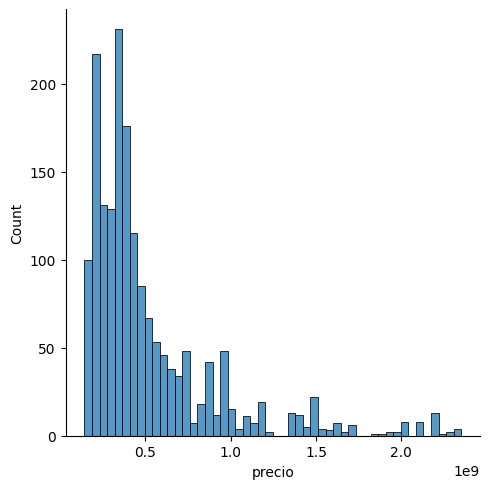

In [19]:
# distribucion de la variable precio
sns.displot(dfpropiedades['precio'],bins=50)

Se puede observar un sesgo hacia la izquierda de los datos, es decir, la concentracion de datos de precios de viviendas se concentra en los precios mas bajos, es mas difcil encontrar viviendas con precios altos 

In [20]:
# precio de las 5 viviendas mas costosas
dfpropiedades['precio'].nlargest(5)

150     2350000000
660     2350000000
945     2350000000
1546    2350000000
210     2300000000
Name: precio, dtype: int64

In [21]:
# precio de las 5 viviendas mas economicas
dfpropiedades['precio'].nsmallest(5)

469     143000000
235     145000000
301     145000000
902     145000000
1104    145000000
Name: precio, dtype: int64

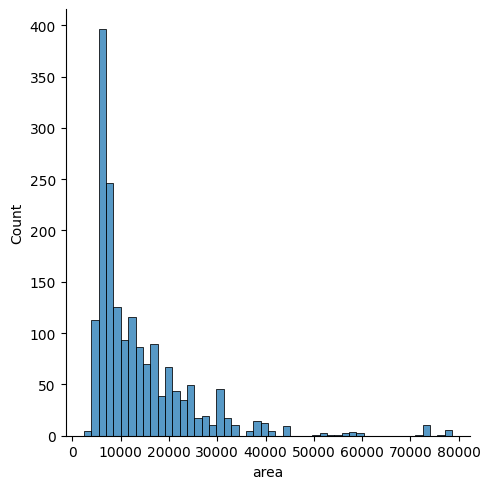

In [22]:
# distribucion de la variable area
sns.displot(dfpropiedades['area'],bins=50)

Se puede observar un sesgo hacia la izquierda de los datos, es decir, la concentracion de datos del area de las viviendas se concentra en las areas mas bajos, es mas difcil encontrar viviendas con grandes extensidades de terreno.
De aqui se puede deducir que hay un auge en la venta de apartamentos

In [23]:
# area de las casas mas peqeñas
dfpropiedades['area'].nsmallest(5)

1285    2400.0
69      3200.0
418     3500.0
1704    3800.0
1712    3900.0
Name: area, dtype: float64

In [24]:
# area de las casas mas grandes
dfpropiedades['area'].nlargest(5)

218    78600.0
183    78000.0
51     77222.0
708    77222.0
711    77222.0
Name: area, dtype: float64

In [25]:
dfpropiedades = dfpropiedades[dfpropiedades['area'] > 10]


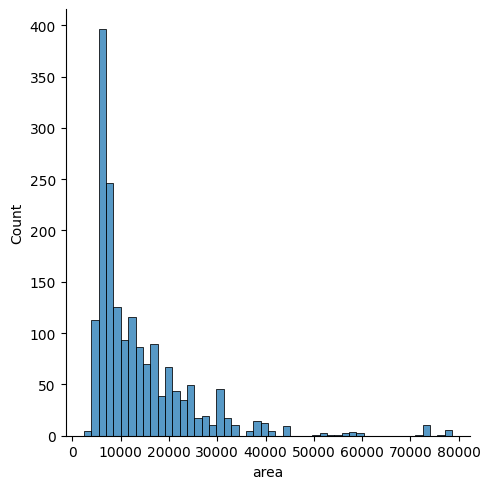

In [26]:
sns.displot(dfpropiedades['area'],bins=50)

In [27]:
dfpropiedades.shape

(1771, 22)

In [28]:
num_mayores = sum(datos['edad'] > 18)
print(num_mayores)


NameError: name 'datos' is not defined